<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week2/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_images.shape
#(28 X 28)이 60000개

(60000, 28, 28)

In [4]:
train_images[0].shape

(28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
import pandas as pd
df = pd.DataFrame(train_labels)
df.value_counts()

#10 categories 0-9

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
test_images.shape
#(28 X 28)이 10000개

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),  #크기가 512인 layer
    layers.Dense(10, activation="softmax") #크기가 10인 layer
])

**The compilation step**

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
train_images = train_images.reshape((60000, 28 * 28)) #(60000, 784)으로 바꿈
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [16]:
train_images[0].shape

(784,)

In [17]:
len(train_images[0])

784

In [18]:
len(train_images)

60000

In [21]:
import numpy as np
a = np.array([[[1,3],[1,2]],[[1,1],[1,0]]])

In [22]:
a.shape

(2, 2, 2)

In [23]:
a.reshape(2,4)
#이런식으로 28*28이 (784,)으로 바뀜

array([[1, 3, 1, 2],
       [1, 1, 1, 0]])

In [24]:
train_images = train_images.astype("float32") / 255
#[0-255]의 값을 255로 나눠줌으로서 [0,1]의 값으로 만들어줌
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [26]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# batch_size가 100이라면 600번 update

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2615 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1071 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0700 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0511 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0386 - accuracy: 0.9884


**Using the model to make predictions**

In [27]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits) 
predictions[0]

1/1 [==============================] - 0s 83ms/step


array([2.6579837e-08, 7.9503243e-10, 8.9614878e-06, 8.7035864e-05,
       2.7153180e-12, 7.1372384e-09, 8.2525539e-13, 9.9990314e-01,
       4.6190969e-08, 7.8821870e-07], dtype=float32)

In [28]:
predictions.shape
#layers.Dense(10, activation="softmax") 크기가 10인 layer 생성했기 때문
#test_images[0:10] 0개를 예측했음

(10, 10)

In [29]:
predictions[0].argmax() #가장 높은 확률값을 가진 인덱스

7

In [30]:
predictions[0][7]

0.99990314

In [31]:
test_labels[0]

7

**Evaluating the model on new data**

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9760
test_acc: 0.9760000109672546


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [33]:
import numpy as np
x = np.array(12)
x

array(12)

In [34]:
x.ndim

0

### Vectors (rank-1 tensors)

In [35]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [36]:
x.ndim

1

### Matrices (rank-2 tensors)

In [37]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [38]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [39]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [40]:
train_images.ndim

3

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
train_images.dtype
#unit은 양수만 가능한 데이터 타입. uint8 : 0~255

dtype('uint8')

In [43]:
type(train_images)

numpy.ndarray

**Displaying the fourth digit**

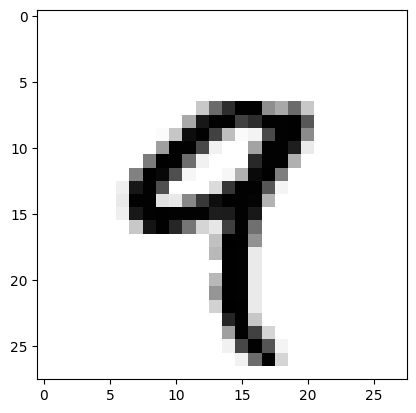

In [44]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
#imshow : array의 값들을 색으로 환산해 이미지의 형태로 보여줌
#0~1 사이의 숫자로 변환한 후 이미지로 나타냄
#reshape한 상태면 train_images[4]는 1차원 벡터기 때문에 오류남.
plt.show()

In [45]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [46]:
train_images.shape

(60000, 28, 28)

In [47]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [48]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [49]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape
#셋 다 같은 거임

(90, 28, 28)

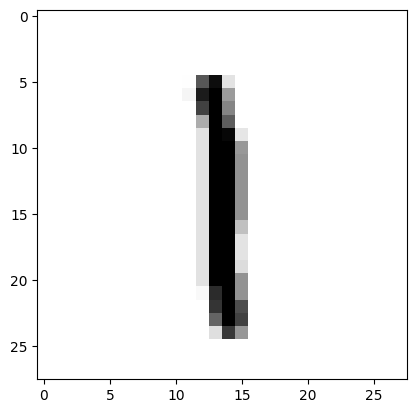

In [50]:
import matplotlib.pyplot as plt
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [51]:
my_slice = train_images[10:100, 7:-7, 7:-7]
# 7:-7 은 7부터 ->, -7부터 <-

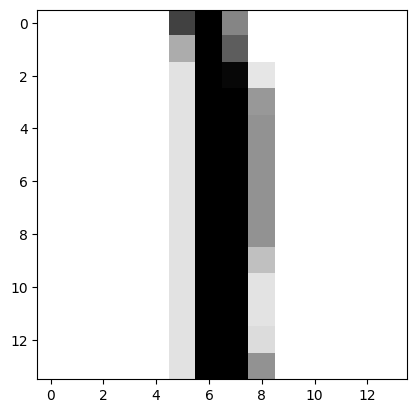

In [52]:
import matplotlib.pyplot as plt
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### The notion of data batches

batch_size = 128

In [53]:
batch = train_images[:128]

In [54]:
batch = train_images[128:256]

In [55]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations (요소별 연산)

In [57]:
def naive_relu(x):
    assert len(x.shape) == 2           #가정 설정문
    x = x.copy()                       #copy 해줘야함
    for i in range(x.shape[0]):        #행
        for j in range(x.shape[1]):    #열
            x[i, j] = max(x[i, j], 0)
    return x
    
#relu함수 구현

In [58]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
#len(x.shape) == 2 이어야함

In [59]:
naive_relu(x)

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [60]:
x
#원본 x는 안변함
#x.copy했기 때문

array([[ 1,  2,  3,  4],
       [ 1, -1, -3,  0]])

In [61]:
def naive_relu(x):
    assert len(x.shape) == 2 
    #copy 안함
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [62]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
naive_relu(x)

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [63]:
x
#copy 안쓰면 원본 x가 바뀜

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [64]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [65]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
y= np.array([[1,2,3,4],[1,-1,-3,0]])

In [66]:
naive_add(x,y)

array([[ 2,  4,  6,  8],
       [ 2, -2, -6,  0]])

In [67]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
#shape가 (20,100)인 행렬 랜덤으로 생성, 0~1

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [68]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.20 s


for loop가 2개 있어서 vectorise 버전보다 naive operation이 시간이 더 오래 걸림

### Broadcasting

In [69]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [70]:
X.shape

(32, 10)

In [71]:
y.shape

(10,)

In [72]:
y

array([0.26953578, 0.75454576, 0.36834671, 0.31394295, 0.97861983,
       0.20882662, 0.21910443, 0.15178052, 0.93818355, 0.7029828 ])

In [73]:
(X+y).shape
#브로드캐스팅 된 거

(32, 10)

브로드캐스팅 구현

In [74]:
y = np.expand_dims(y, axis=0)
#y에 차원을 추가. (10,) -> (1,10)
#axis=1 : (10,) -> (10,1)

In [75]:
y.shape

(1, 10)

In [76]:
y

array([[0.26953578, 0.75454576, 0.36834671, 0.31394295, 0.97861983,
        0.20882662, 0.21910443, 0.15178052, 0.93818355, 0.7029828 ]])

In [77]:
[y]

[array([[0.26953578, 0.75454576, 0.36834671, 0.31394295, 0.97861983,
         0.20882662, 0.21910443, 0.15178052, 0.93818355, 0.7029828 ]])]

In [78]:
Y = np.concatenate([y] * 32, axis=0)
#y*32 는 각 값에 32곱하는 거
#axis = 0 행방향으로 배열 합치기
#y 벡터가 32번 copy

In [79]:
Y.shape

(32, 10)

In [80]:
X + Y
# 브로드캐스팅에 의해 X + y 랑 같은 결과

array([[0.72750617, 1.1571646 , 1.28036465, 1.00931344, 1.85129671,
        0.24193481, 1.13425514, 1.01511253, 1.41487506, 1.33986978],
       [1.08857949, 1.05674724, 1.01251141, 0.59850594, 1.43546292,
        0.62453652, 0.40815341, 1.12539414, 1.48177101, 1.46212769],
       [1.036171  , 0.84036039, 0.59371126, 0.44514343, 1.80920775,
        0.38394966, 0.99838495, 0.8091624 , 1.15500655, 1.28853397],
       [1.24116519, 1.7377523 , 1.33471516, 0.50250547, 1.53458068,
        0.53923259, 0.40175156, 0.89761459, 1.79348719, 1.29193654],
       [0.85474936, 1.5710203 , 0.96894665, 0.34426656, 1.60873627,
        0.88934482, 0.49184314, 1.09613072, 0.98690489, 1.11007961],
       [1.05266377, 1.11635195, 1.04377793, 0.39104029, 1.79944894,
        0.76090378, 0.58613056, 0.79278072, 1.83305345, 1.47483711],
       [0.62800085, 1.38382541, 0.65243838, 0.43403618, 1.07650854,
        0.22393098, 0.53457276, 0.76410819, 1.79919256, 1.52744698],
       [0.47576719, 1.26597766, 1.3475034

In [81]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [82]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [83]:
z.shape
#브로드캐스팅을 통해 (32,10)을 반복해서 shape(64,3,32,10)이 되게 함
#larger tensor에 맞춤

(64, 3, 32, 10)

### Tensor product

In [84]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y) #벡터 곱셉

In [85]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [86]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [87]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [88]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [89]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [90]:
train_images = train_images.reshape((60000, 28 * 28))

In [91]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [92]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [93]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [118]:
import tensorflow as tf
x = tf.Variable(0.)                    #tensorflow 변수 생성, 초기값 0.
with tf.GradientTape() as tape:       
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)  #y를 x에 대해서 미분

In [119]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [98]:
x = tf.Variable(tf.random.uniform((2, 2)))  #uniform 분포하에서 (2,2)행렬
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [104]:
tf.random.uniform((2, 2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.8381517 , 0.7202667 ],
       [0.10425436, 0.48790634]], dtype=float32)>

In [99]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [144]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b                       #행렬 곱
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])  #y를 W와 b에 대해 미분

In [147]:
grad_of_y_wrt_W_and_b
#list 형식으로 나옴
#브로드캐스팅 돼서 b에 대한 미분값이 2인듯?

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.1304083 , 1.1304083 ],
        [0.96557367, 0.96557367]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [148]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [149]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [150]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [151]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2645 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1076 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0704 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0518 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0379 - accuracy: 0.9888


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [152]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)                                     #w의 shape지정
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)     #w의 초기값 지정. 0~0.1
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)                                                #b의 shape지정
        b_initial_value = tf.zeros(b_shape)                                     #b의 초기값 지정. 0
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)              #wx + b를 활성화 함수에 넣음, 순전파

    @property
    def weights(self):
        return [self.W, self.b]                                                 #가중치 w와 b

#### A simple Sequential class

In [154]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers             #L1, L2

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)                  
        return x                         #L2(L1(x))

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights                    #각 레이어들의 wieghts

In [155]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [156]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)                  #math.ceil : 올림 함수

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]         #0~배치크기
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size                                           #배치크기~2*배치크기
        return images, labels

### Running one training step

In [157]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)                                       #배치 1에 대한 예측값
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(    #배치 1에 대한 loss
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)                        #열 단위 평균
    gradients = tape.gradient(average_loss, model.weights)                      #loss를 weight에 대해 미분
    update_weights(gradients, model.weights)                     
    return average_loss

In [158]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)   #미분값에 learning rate를 곱하고 w에서 빼준다

In [159]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [160]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs): #에포크 수
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches): #배치 수
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0: #배치가 100의 배수일 때
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [161]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.62
loss at batch 100: 2.21
loss at batch 200: 2.18
loss at batch 300: 2.07
loss at batch 400: 2.16
Epoch 1
loss at batch 0: 1.88
loss at batch 100: 1.85
loss at batch 200: 1.79
loss at batch 300: 1.70
loss at batch 400: 1.77
Epoch 2
loss at batch 0: 1.55
loss at batch 100: 1.55
loss at batch 200: 1.47
loss at batch 300: 1.42
loss at batch 400: 1.46
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.31
loss at batch 200: 1.21
loss at batch 300: 1.20
loss at batch 400: 1.23
Epoch 4
loss at batch 0: 1.10
loss at batch 100: 1.13
loss at batch 200: 1.02
loss at batch 300: 1.04
loss at batch 400: 1.07
Epoch 5
loss at batch 0: 0.96
loss at batch 100: 1.00
loss at batch 200: 0.88
loss at batch 300: 0.92
loss at batch 400: 0.96
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.89
loss at batch 200: 0.78
loss at batch 300: 0.83
loss at batch 400: 0.87
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.81
loss at batch 200: 0.71
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [162]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary